___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [4]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached MarkupSafe-2.0.1-cp38-cp38-win_amd64.whl (14 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Erişim engellendi: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-0.17.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

ModuleNotFoundError: No module named 'pandas_profiling'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


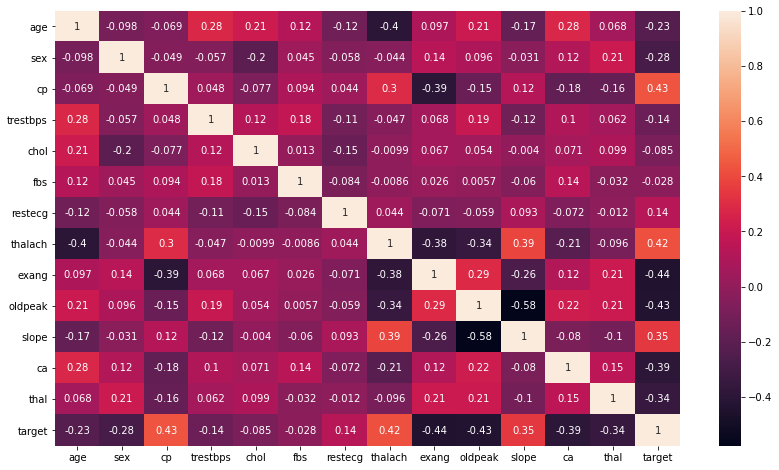

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True);

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

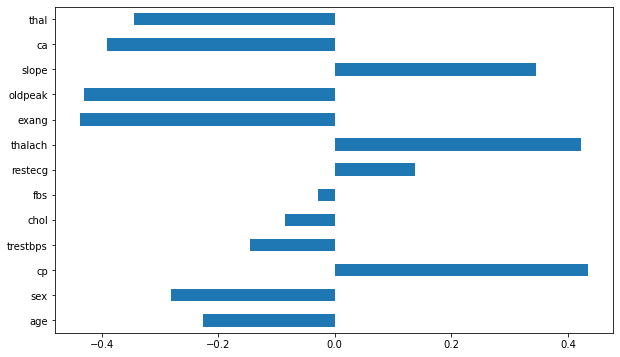

In [11]:
df.corr()['target'].drop('target').plot.barh()

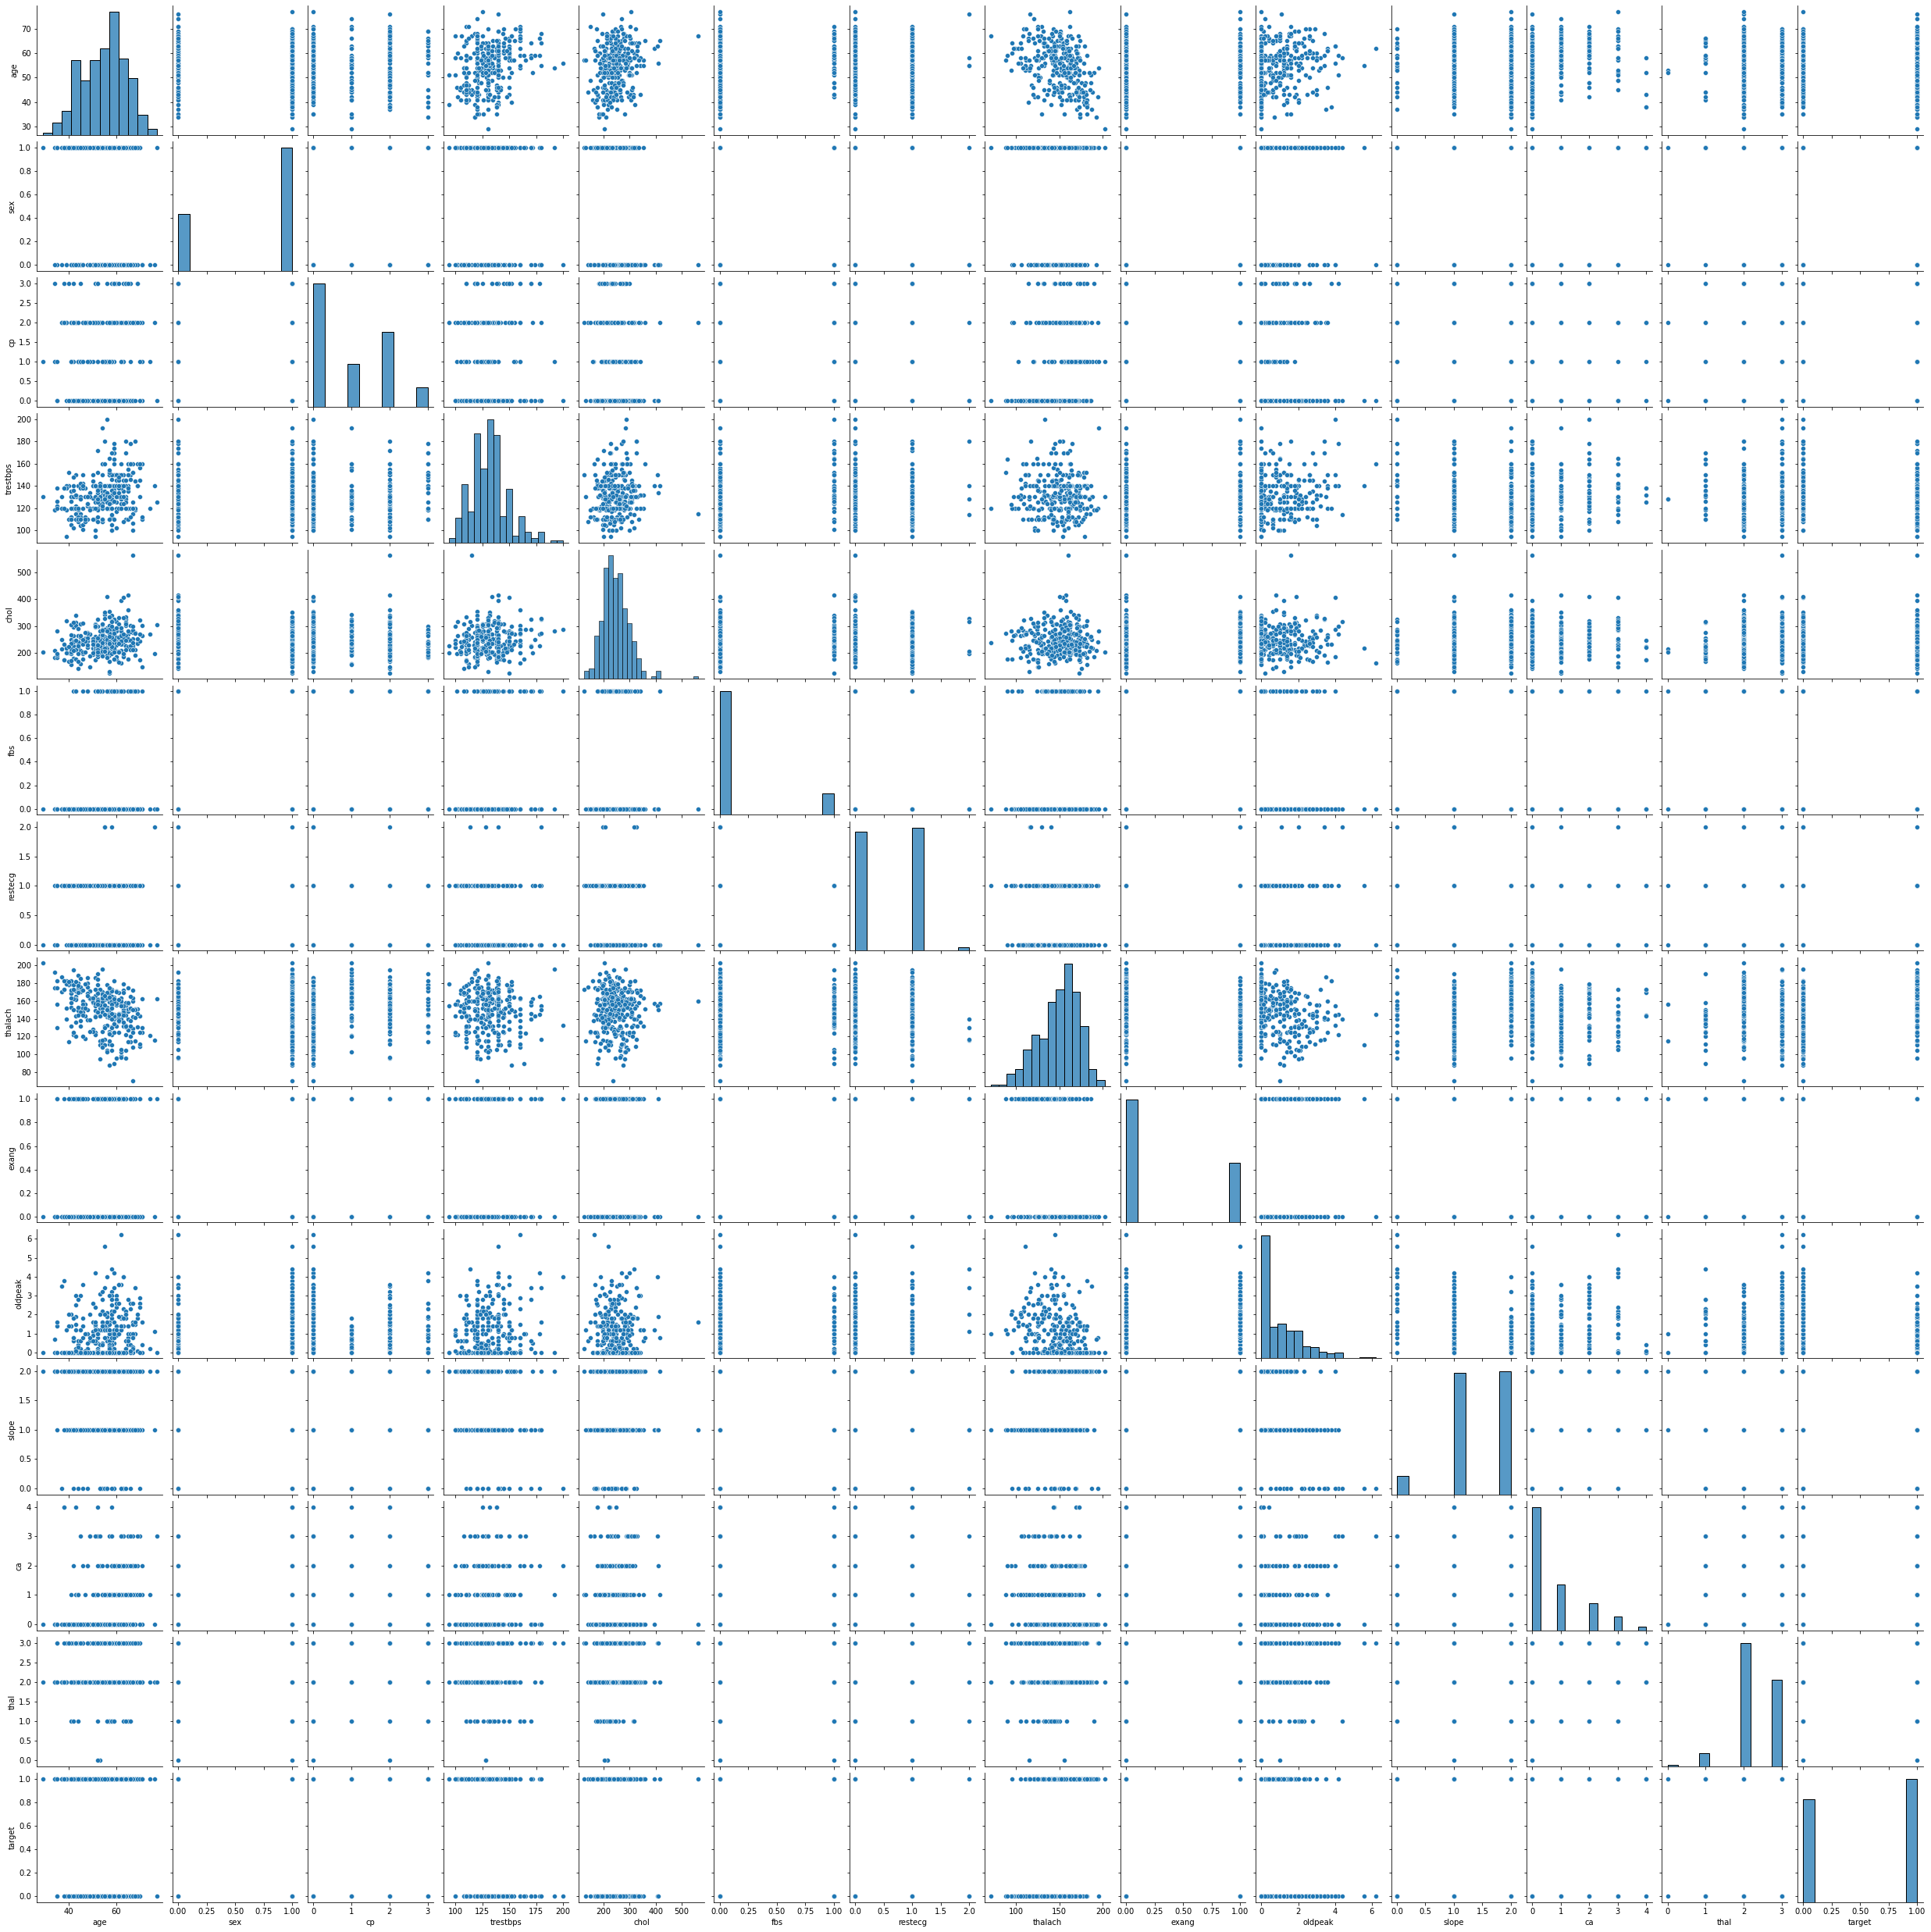

In [12]:
sns.pairplot(df)

In [13]:
df.duplicated().sum()

1

In [14]:
df = df.drop_duplicates()

In [15]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

# Data Preprocessing

In [16]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("target",axis=1)
y= df.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [40]:
log_model= LogisticRegression()

In [41]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
# elasstik net SADE """"""saga"""""" day dı. tüm penaltı deperlerini kullanıabilmesi için 
# multi class çizimler düzgün olsun diye ovr.
# GRİD search yapmadan ben hyper parametre girdim.

In [42]:
penalty = ["l1", "l2", "elasticnet","none"]
l1_ratio = np.linspace(0, 1, 20) # aradaki değerleri linear olarak dağıtıyor.
C = np.logspace(0, 10, 20)  # aradaki değerleri logaritmik olarak dağıtıyor.

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}
# best parametreler neler bakalım.

In [43]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [44]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [45]:
grid_model.best_params_
# C yi artırmış cezayı düşürmüş.
# l1 ratio düşmüş l2 yap demek
# penaltı da l1 yap demiş.
# sanki regulüze yok gibi.
# BURASI ÖNEMLİ

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [46]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [47]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12  2]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

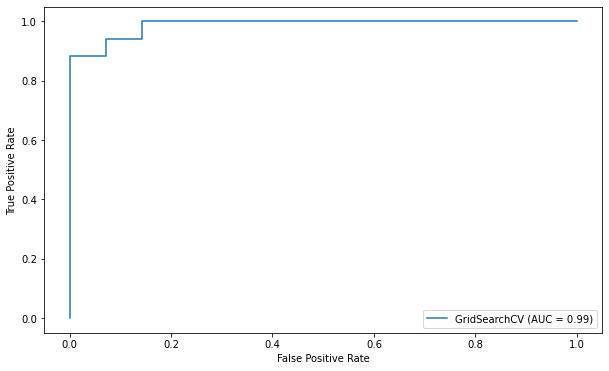

In [51]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

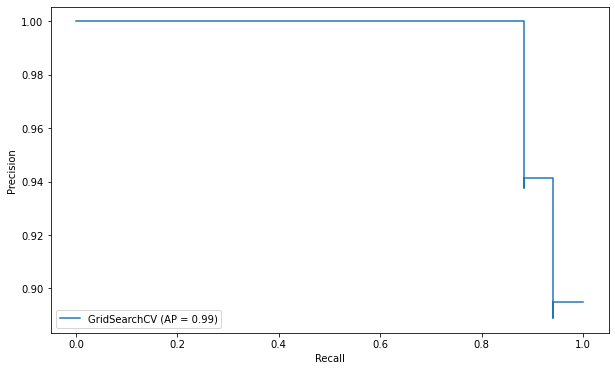

In [52]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

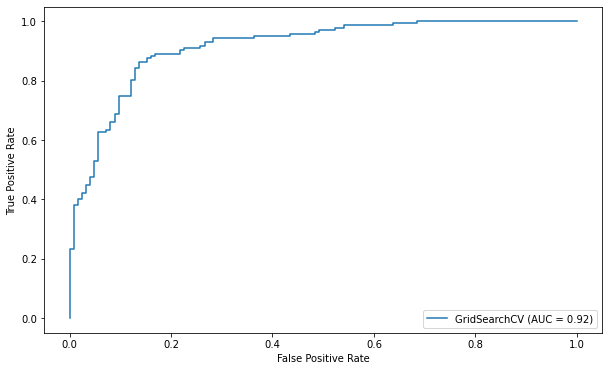

In [53]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

# Implement KNN and Evaluate

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn_grid = KNeighborsClassifier()

In [66]:
k_values= range(1,30)

In [67]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [68]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [69]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [70]:
knn_grid_model.fit(scaled_X_test, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [71]:
knn_grid_model.best_params_

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

In [72]:
y_pred = knn_grid_model.predict(X_test_scaled)

In [73]:
print(confusion_matrix(y_test,y_pred))

[[13  1]
 [ 2 15]]


In [77]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21, p =1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=21


[[12  2]
 [ 1 16]]


              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



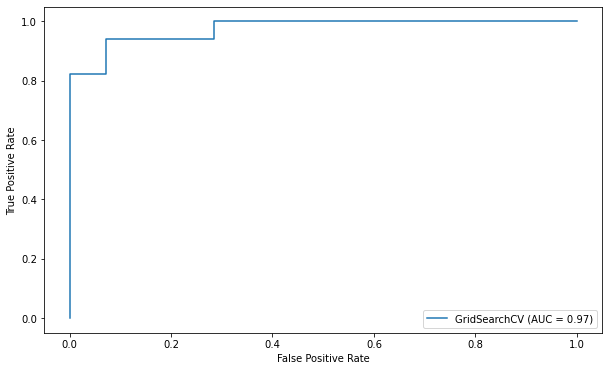

In [74]:
plot_roc_curve(knn_grid_model, X_test_scaled, y_test)

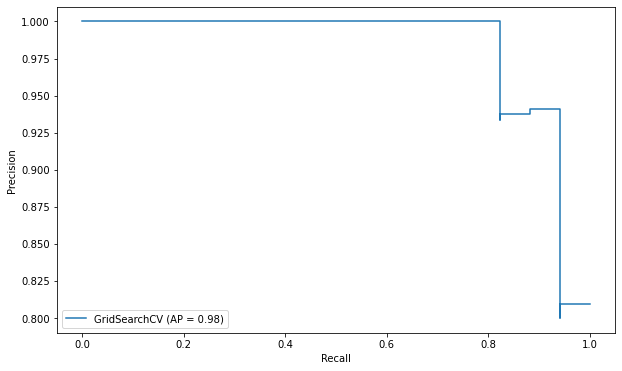

In [75]:
plot_precision_recall_curve(knn_grid_model,X_test_scaled,y_test)

# Implement SVM and Evaluate

In [103]:
from sklearn.svm import SVC

In [104]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
svm_grid = GridSearchCV(svm,param_grid)

In [105]:
svm_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [106]:
svm_grid.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [107]:
y_pred = svm_grid(X_test)

TypeError: 'GridSearchCV' object is not callable

In [108]:
print(confusion_matrix(y_test_scaled))

NameError: name 'y_test_scaled' is not defined

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31



# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 

In [110]:
final_X_scaled = scaler.fit_transform(X)

In [ ]:
final_svm_grid = svm_grid.fit(X,y)

In [ ]:
df.head(1)

In [ ]:
values = [[25,0,2,180,200,0,0,200,1,1.8,1,1,0]]

In [ ]:
svm_grid.predict(values)